## Data Science Intern 
## Author : Chandrashekar R
## Beginner Level Task 1

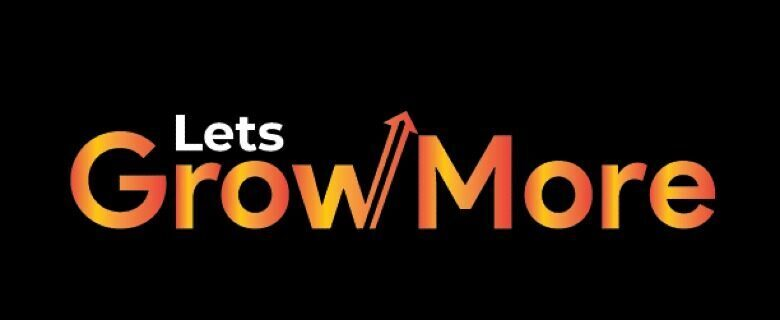

# Iris Flower Classification

### PROBLEM STATEMENT

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

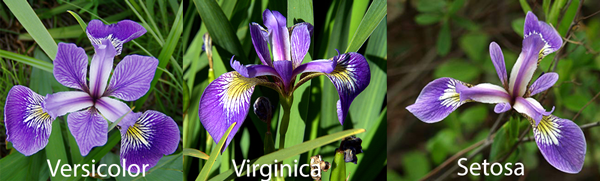

#### I will start the task of Iris flower classification by importing the necessary Python libraries and the dataset that we need for this task:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

Load the dataset and look first five rows of the dataset

In [47]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Look Shape of the Dataset

In [48]:
df.shape

(150, 6)

The target labels of this dataset are present in the species column, let’s have a quick look at the target labels

In [49]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


let’s have a look at the descriptive statistics of this dataset

In [51]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [53]:
df['class'] = df.Species.replace({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2})

In [54]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

            class  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


## Data Visualization

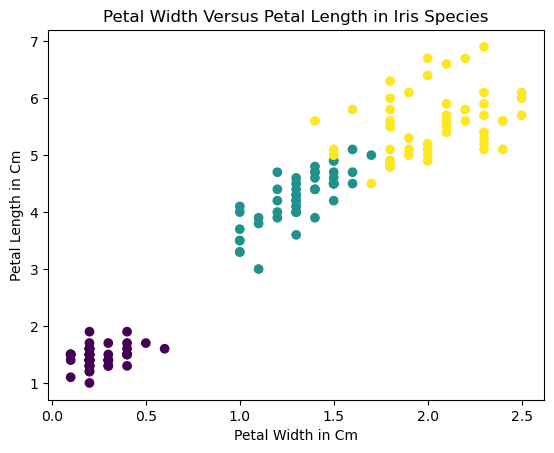

In [55]:
x = df.PetalWidthCm
y = df.PetalLengthCm
plt.scatter(x, y, c=df['class'])
plt.title("Petal Width Versus Petal Length in Iris Species")
plt.xlabel("Petal Width in Cm")
plt.ylabel("Petal Length in Cm")
plt.show()

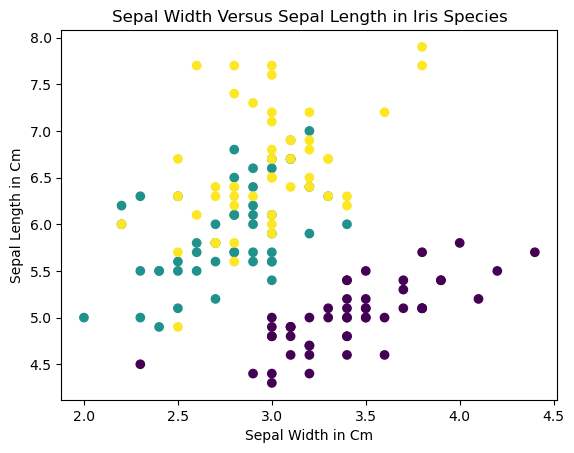

In [56]:
x = df.SepalWidthCm
y = df.SepalLengthCm
plt.scatter(x, y, c=df['class'])
plt.title("Sepal Width Versus Sepal Length in Iris Species")
plt.xlabel("Sepal Width in Cm")
plt.ylabel("Sepal Length in Cm")
plt.show()

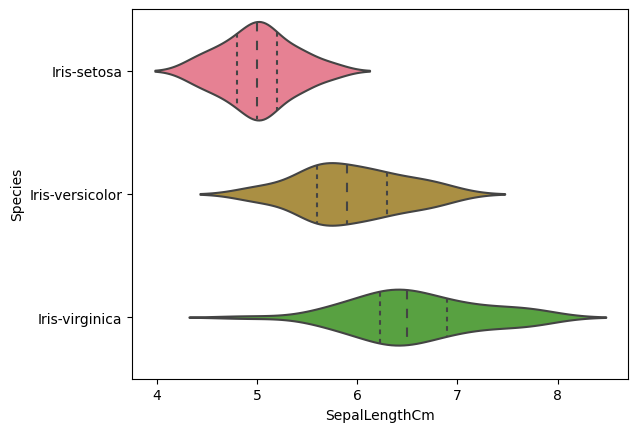

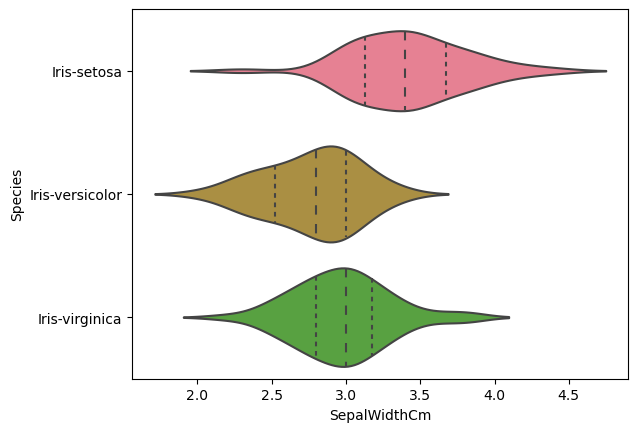

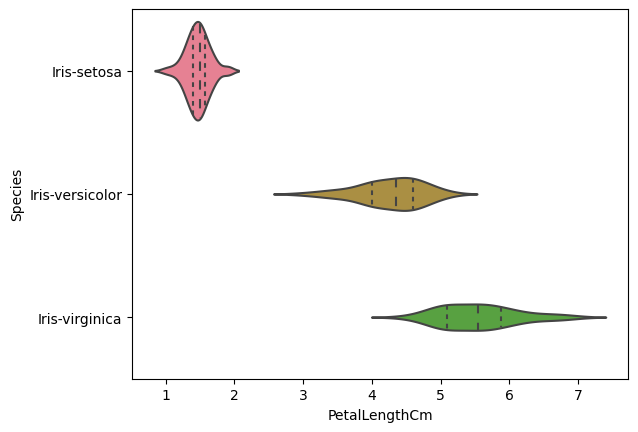

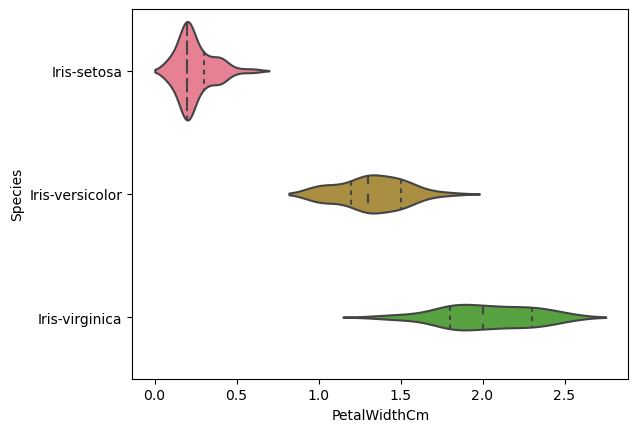

In [57]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

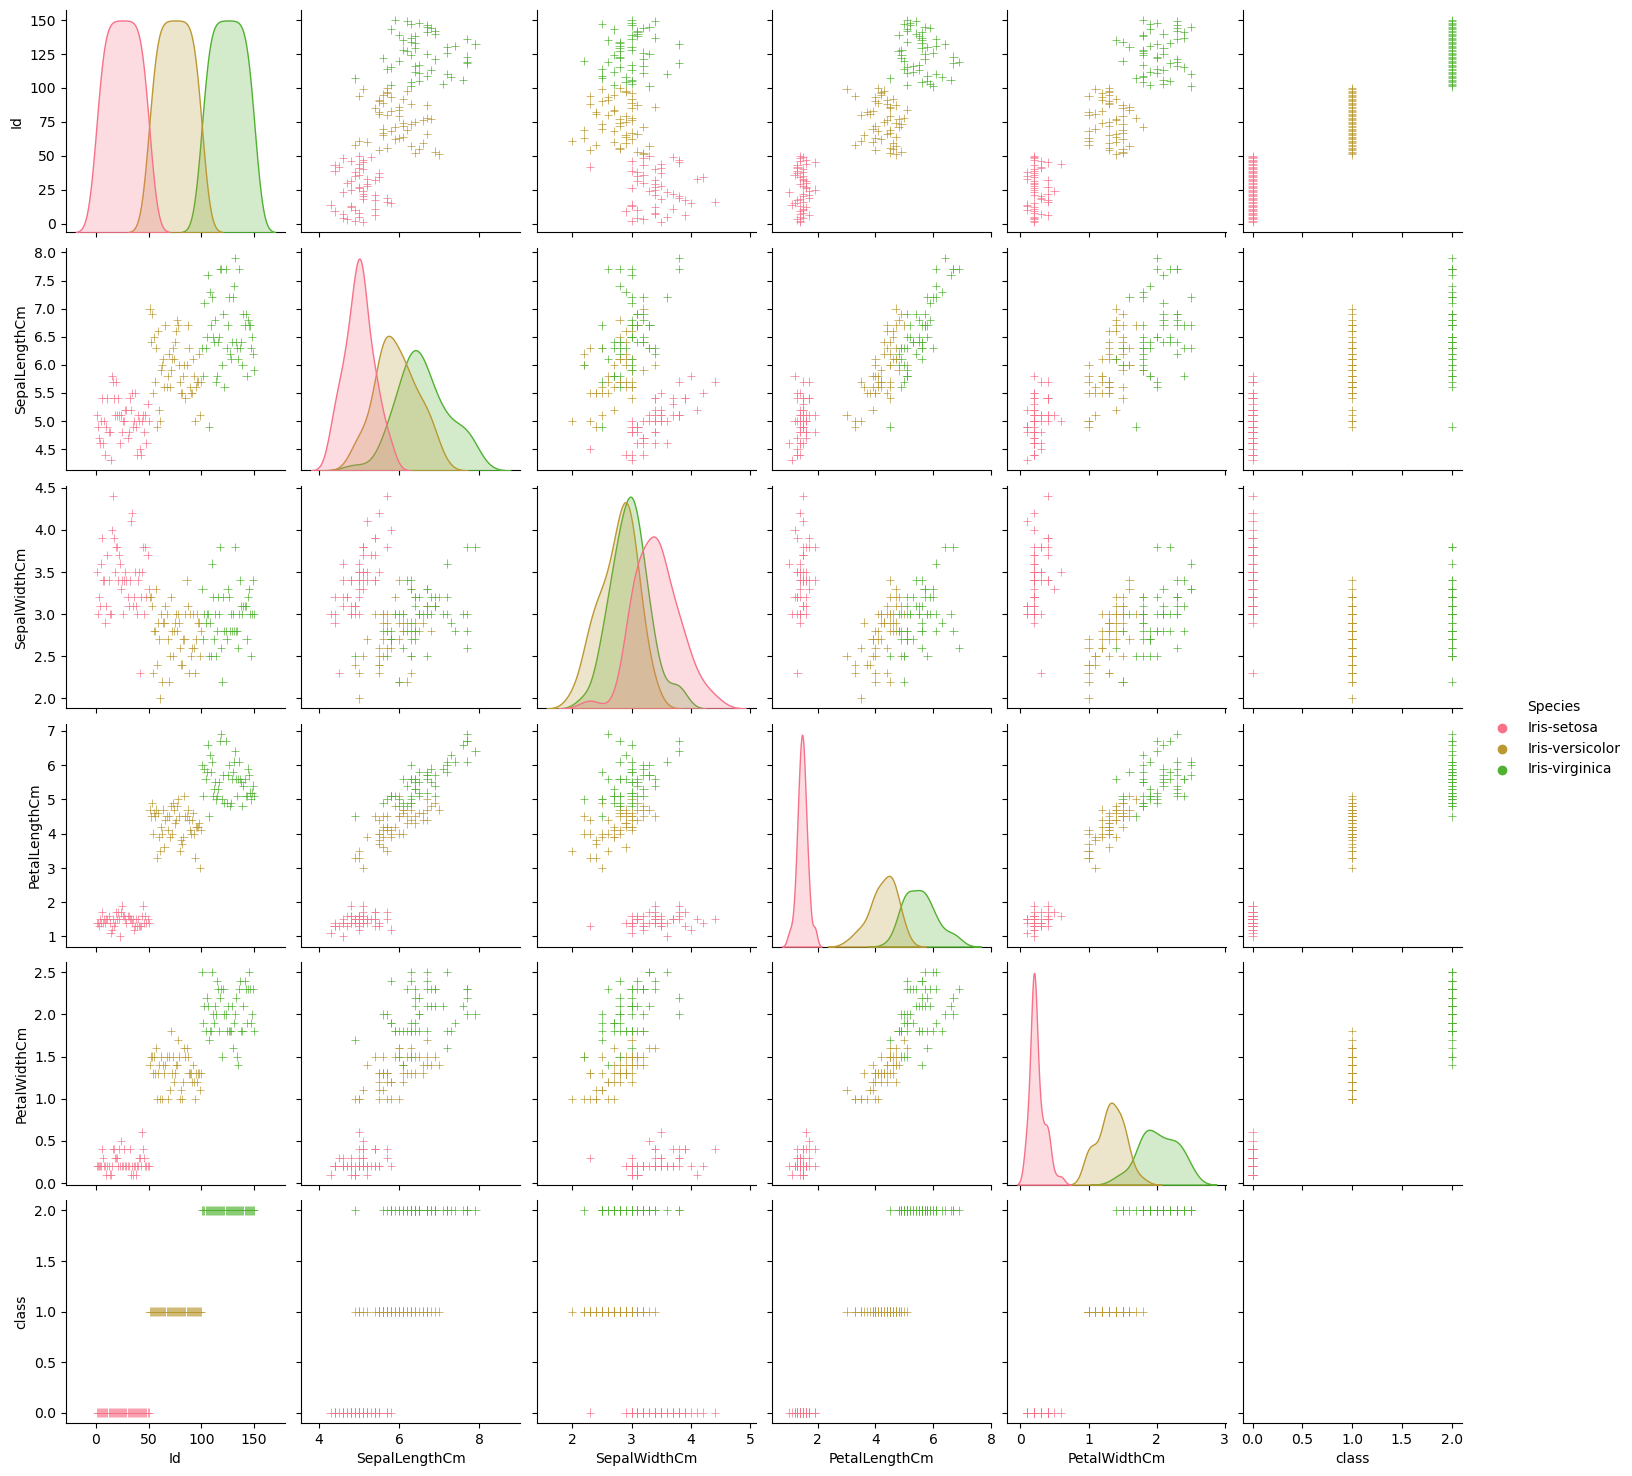

In [58]:
sns.pairplot(df, hue='Species', markers='+')
plt.show()

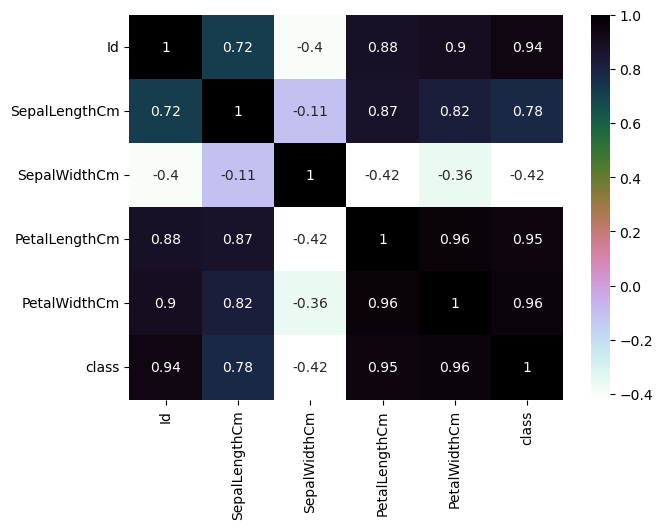

In [59]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [60]:
# In order to do a predictive task, we should split up the data into two groups, our testing and training data.
# An 80% train, 20% test split usually works fine.
randomized_df = df.sample(frac=1)
split = int((0.8)*len(df))
train = randomized_df.iloc[0:split, :]
test = randomized_df.iloc[split:, :]

In [61]:
# Split test and train into X and y data
train_X = train.iloc[:, 1:5]
train_y = train.iloc[:, 6]
test_X = test.iloc[:, 1:5]
test_y = test.iloc[:, 6]

In [62]:
# Train Knn on features
classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)

KNeighborsClassifier()

In [63]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [64]:
# Use trained classifier to predict test data labels
predictions = classifier.predict(test_X)

C:\Users\rchan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
print("Accuracy on test dataset:", round(sum(predictions == test_y)/(len(test_y)),2))


Accuracy on test dataset: 0.93
